In [2]:
import pandas as pd
import numpy as np

#### Choosing columns with meaning, handling NA's

In [3]:
df = pd.read_csv('dataset.csv')

df.columns = df.columns.str.lower().str.replace(' ','_')

df.head()

,age,gender,weight_(kg),height_(m),max_bpm,avg_bpm,resting_bpm,session_duration_(hours),calories_burned,workout_type,fat_percentage,water_intake_(liters),workout_frequency_(days/week),experience_level,bmi
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.isna().sum()

age                              0
gender                           0
weight_(kg)                      0
height_(m)                       0
max_bpm                          0
avg_bpm                          0
resting_bpm                      0
session_duration_(hours)         0
calories_burned                  0
workout_type                     0
fat_percentage                   0
water_intake_(liters)            0
workout_frequency_(days/week)    0
experience_level                 0
bmi                              0
dtype: int64

#### EDA analisys

In [5]:
for col in df.columns:
    print(df.groupby(col)[col].count(), "\n")

age
18    27
19    26
20    25
21    20
22    27
23    25
24    15
25    26
26    21
27    18
28    23
29    23
30    19
31    24
32    21
33    21
34    24
35    17
36    21
37    19
38    20
39    23
40    25
41    26
42    27
43    34
44    16
45    30
46    21
47    23
48    17
49    26
50    33
51    19
52    32
53    23
54    30
55    18
56    27
57    23
58    19
59    19
Name: age, dtype: int64 

gender
Female    462
Male      511
Name: gender, dtype: int64 

weight_(kg)
40.0     2
40.3     1
40.4     2
40.5     2
40.6     1
        ..
128.4    3
129.0    1
129.2    1
129.5    1
129.9    1
Name: weight_(kg), Length: 532, dtype: int64 

height_(m)
1.50    11
1.51    11
1.52    22
1.53    14
1.54    12
1.55    20
1.56    14
1.57    18
1.58    20
1.59    15
1.60    27
1.61    36
1.62    44
1.63    29
1.64    22
1.65    24
1.66    25
1.67    26
1.68    31
1.69    26
1.70    18
1.71    30
1.72    28
1.73    16
1.74    27
1.75    26
1.76    37
1.77    37
1.78    22
1.79    32
1.80   

In [6]:
from matplotlib import pyplot as plt
from math import ceil

def eda_categorys(cat):
    
    filas = ceil(cat.shape[1] / 2)

    _, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    ax = ax.flat 

    for every, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[every])
        ax[every].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[every].tick_params(labelsize = 12)

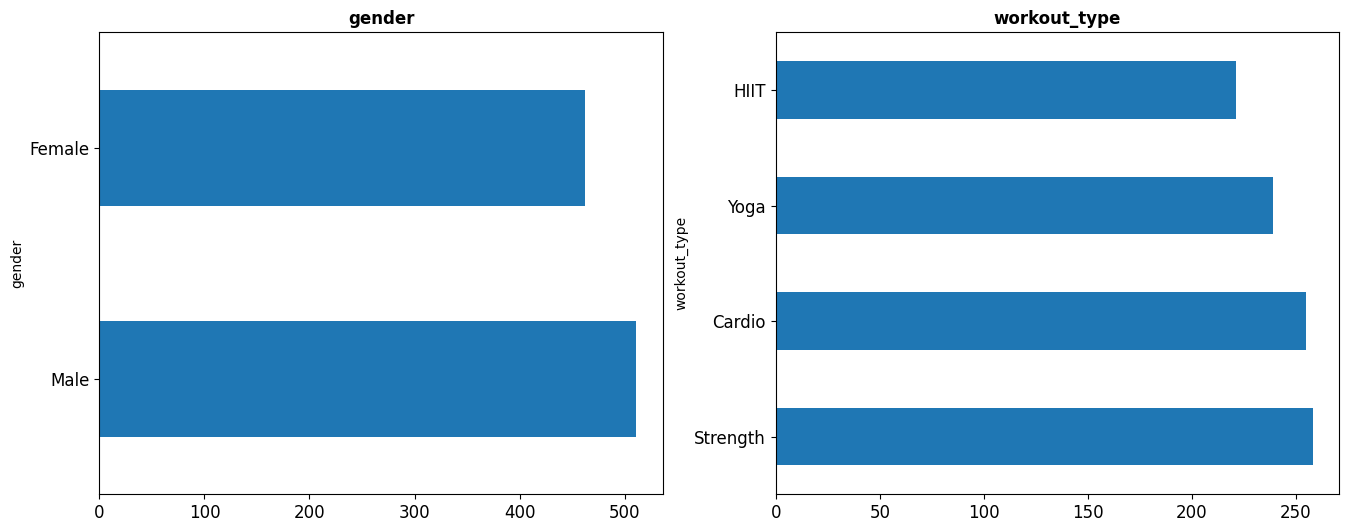

In [7]:
eda_categorys(df.select_dtypes('O'))

In [8]:
def stats_cont(num):

    stats = num.describe().T

    stats['median'] = num.median()

    stats = stats.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(stats)

In [9]:
stats_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
age,973.0,38.683453,40.00,12.180928,18.00,28.00,40.00,49.00,59.00
weight_(kg),973.0,73.854676,70.00,21.207500,40.00,58.10,70.00,86.00,129.90
height_(m),973.0,1.722580,1.71,0.127720,1.50,1.62,1.71,1.80,2.00
max_bpm,973.0,179.883864,180.00,11.525686,160.00,170.00,180.00,190.00,199.00
avg_bpm,973.0,143.766701,143.00,14.345101,120.00,131.00,143.00,156.00,169.00
resting_bpm,973.0,62.223022,62.00,7.327060,50.00,56.00,62.00,68.00,74.00
session_duration_(hours),973.0,1.256423,1.26,0.343033,0.50,1.04,1.26,1.46,2.00
calories_burned,973.0,905.422405,893.00,272.641516,303.00,720.00,893.00,1076.00,1783.00
fat_percentage,973.0,24.976773,26.20,6.259419,10.00,21.30,26.20,29.30,35.00
water_intake_(liters),973.0,2.626619,2.60,0.600172,1.50,2.20,2.60,3.10,3.70


#### Model Selection

In [39]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['calories_burned']
y_val = df_val['calories_burned']
y_test = df_test['calories_burned']

del df_train['calories_burned']
del df_val['calories_burned']
del df_test['calories_burned']

df_train.iloc[0].to_dict()

{'age': 35,
 'gender': 'Male',
 'weight_(kg)': 102.5,
 'height_(m)': 1.94,
 'max_bpm': 183,
 'avg_bpm': 158,
 'resting_bpm': 64,
 'session_duration_(hours)': 0.84,
 'workout_type': 'Cardio',
 'fat_percentage': 21.1,
 'water_intake_(liters)': 2.4,
 'workout_frequency_(days/week)': 2,
 'experience_level': 1,
 'bmi': 27.23}

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import xgboost as xgb

In [12]:
def vectorizer(df, features):
    train_dicts = df[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(train_dicts)

    return dv, X

In [13]:
dv, X_train = vectorizer(df_train, df_train.columns)
_, X_val = vectorizer(df_val, df_val.columns)
_, X_test = vectorizer(df_test, df_test.columns)

dv.get_feature_names_out()

array(['age', 'avg_bpm', 'bmi', 'experience_level', 'fat_percentage',
       'gender=Female', 'gender=Male', 'height_(m)', 'max_bpm',
       'resting_bpm', 'session_duration_(hours)', 'water_intake_(liters)',
       'weight_(kg)', 'workout_frequency_(days/week)',
       'workout_type=Cardio', 'workout_type=HIIT',
       'workout_type=Strength', 'workout_type=Yoga'], dtype=object)

#### Random Forest Regressor

In [14]:
result = []
for depth in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        dt = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth=depth)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)

        result.append((depth, n, root_mean_squared_error(y_val, y_pred).round(3)))

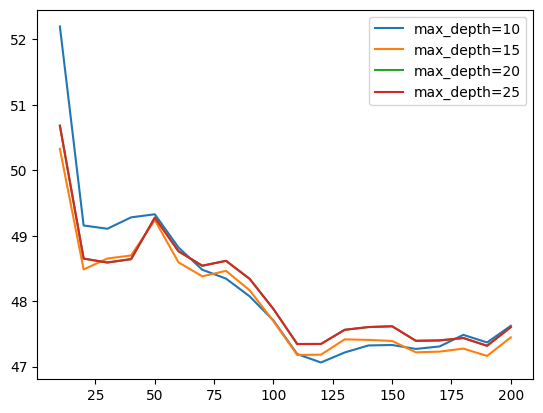

In [15]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(result, columns=columns)

for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [16]:
scores = []

for s in [1, 5, 10, 15, 20, 500, 100, 200]:
    for n in range(10, 201, 10):
        dt = RandomForestRegressor(max_depth=10, min_samples_leaf=s, n_estimators=n)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        
        scores.append((s, n, root_mean_squared_error(y_val, y_pred).round(3)))

In [17]:
columns = ['min_samples_leaf', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

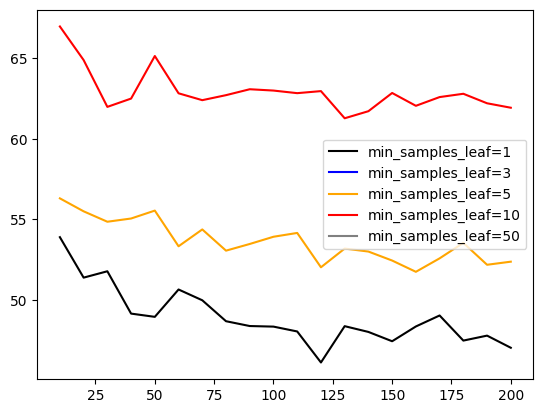

In [18]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

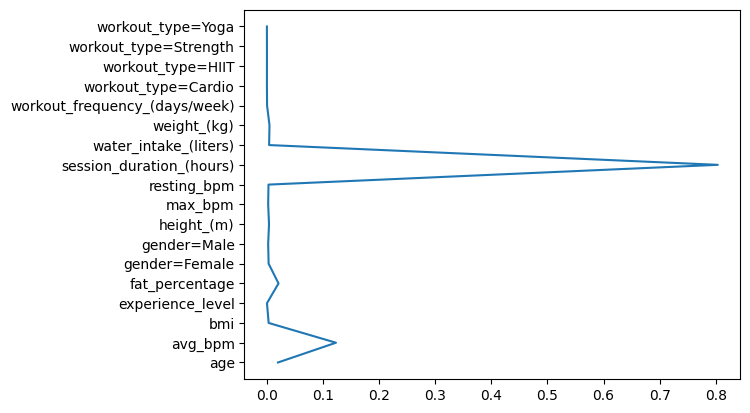

In [19]:
dt = RandomForestRegressor(n_estimators=60, random_state=1, n_jobs=-1, max_depth=10, min_samples_leaf=1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)

plt.plot(dt.feature_importances_,dv.get_feature_names_out())

In [20]:
from sklearn.feature_selection import RFECV

selector = RFECV(dt, step=1, cv=5, scoring='neg_root_mean_squared_error')
selector.fit(X_train, y_train)

optimal_feature_indices = np.where(selector.support_)[0]
best_rmse = np.abs(selector.cv_results_['mean_test_score'][selector.n_features_ - 1])

In [21]:
print("Optimal Feature Indices:", optimal_feature_indices)
print("Best RMSE:", best_rmse)

Optimal Feature Indices: [ 0  1  4  6 10 12]
Best RMSE: 48.6621502008078


#### Desicion Tree Regressor

In [22]:
result = []
for depth in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeRegressor(random_state=1, max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)

        result.append((depth, s, root_mean_squared_error(y_val, y_pred).round(3)))

In [23]:
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

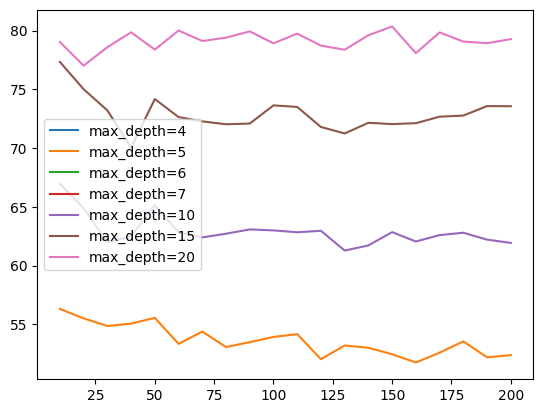

In [24]:
for d in [4, 5, 6, 7, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.min_samples_leaf, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

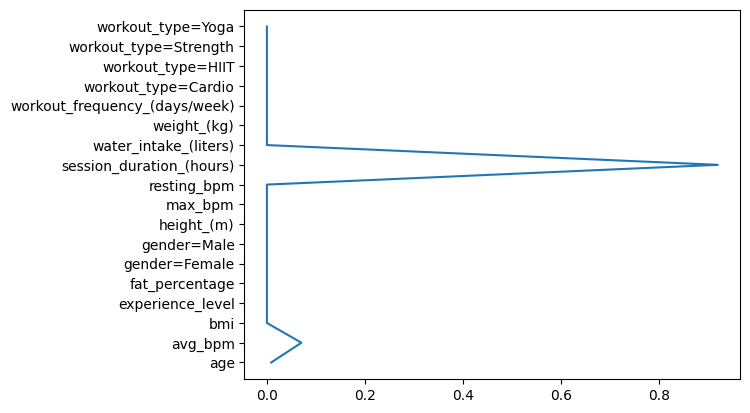

In [ ]:
dt = DecisionTreeRegressor(random_state=1, max_depth=5, min_samples_leaf=60)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)

plt.plot(dt.feature_importances_,dv.get_feature_names_out())

In [26]:
selector = RFECV(dt, step=1, cv=5, scoring='neg_root_mean_squared_error')
selector.fit(X_train, y_train)

optimal_feature_indices = np.where(selector.support_)[0]
best_rmse = np.abs(selector.cv_results_['mean_test_score'][selector.n_features_ - 1])

In [27]:
print("Optimal Feature Indices:", optimal_feature_indices)
print("Best RMSE:", best_rmse)

Optimal Feature Indices: [ 1 10]
Best RMSE: 122.81630717505644


#### XGB Regressor

In [28]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [29]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 1
}

In [30]:
from xgboost import XGBRegressor

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb_reg = XGBRegressor(objective='reg:squarederror', seed=1)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [32]:
best_params = random_search.best_params_
best_score = -random_search.best_score_

best_params, best_score

({'subsample': 0.8,
  'n_estimators': 500,
  'min_child_weight': 5,
  'max_depth': 3,
  'learning_rate': 0.1,
  'gamma': 0.1,
  'colsample_bytree': 0.8},
 np.float64(22.48441233753676))

#### Finishing XGB boost tunning

In [33]:
if 'n_estimators' in best_params:
    num_boost_round = best_params.pop('n_estimators')
else:
    num_boost_round = 100

params.update(best_params)

In [34]:
params, num_boost_round

({'objective': 'reg:squarederror',
  'eval_metric': 'rmse',
  'seed': 1,
  'subsample': 0.8,
  'min_child_weight': 5,
  'max_depth': 3,
  'learning_rate': 0.1,
  'gamma': 0.1,
  'colsample_bytree': 0.8},
 500)

In [38]:
features = ['age', 
            'avg_bpm', 
            'bmi', 
            'experience_level', 
            'fat_percentage', 
            'gender=Female', 
            'gender=Male', 
            'height_(m)', 
            'max_bpm', 
            'resting_bpm', 
            'session_duration_(hours)', 
            'water_intake_(liters)', 
            'weight_(kg)', 
            'workout_frequency_(days/week)', 
            'workout_type=Cardio', 
            'workout_type=HIIT', 
            'workout_type=Strength',
            'workout_type=Yoga']


dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_val, feature_names=features)

dt = xgb.train(params, dtrain, num_boost_round)

y_pred = dt.predict(dval)

print("val", root_mean_squared_error(y_val, y_pred))

val 18.19958243779651


{'age': 35.0,
 'avg_bpm': 158.0,
 'bmi': 27.23,
 'experience_level': 1.0,
 'fat_percentage': 21.1,
 'gender=Female': 0.0,
 'gender=Male': 1.0,
 'height_(m)': 1.94,
 'max_bpm': 183.0,
 'resting_bpm': 64.0,
 'session_duration_(hours)': 0.84,
 'water_intake_(liters)': 2.4,
 'weight_(kg)': 102.5,
 'workout_frequency_(days/week)': 2.0,
 'workout_type=Cardio': 1.0,
 'workout_type=HIIT': 0.0,
 'workout_type=Strength': 0.0,
 'workout_type=Yoga': 0.0}

In [ ]:
def all_except(df, i):
   return df[:, [j for j in range(df.shape[1]) if j not in i]]


In [ ]:
features = ['age', 
            'avg_bpm', 
            'bmi', 
            'experience_level', 
            'fat_percentage', 
            'gender=Female', 
            'gender=Male', 
            'height_(m)', 
            'max_bpm', 
            'resting_bpm', 
            'session_duration_(hours)', 
            'water_intake_(liters)', 
            'weight_(kg)', 
            'workout_frequency_(days/week)', 
            'workout_type=Cardio', 
            'workout_type=HIIT', 
            'workout_type=Strength',
            'workout_type=Yoga']

scores = {}

for i, feature in enumerate(features):

    dtrain = xgb.DMatrix(all_except(X_train, [i]), label=y_train, feature_names=features[:i] + features[i+1:])
    dval = xgb.DMatrix(all_except(X_val, [i]), label=y_val, feature_names=features[:i] + features[i+1:])
    dtest = xgb.DMatrix(all_except(X_test, [i]), label=y_val, feature_names=features[:i] + features[i+1:])

    dt = xgb.train(params, dtrain, num_boost_round)

    y_pred = dt.predict(dval)

    scores[feature] = root_mean_squared_error(y_val, y_pred)

scores = pd.DataFrame.from_dict(scores, orient='index')

scores.sort_values(0)

,0
water_intake_(liters),18.665274
fat_percentage,19.177792
workout_type=Cardio,19.452329
workout_type=HIIT,19.548872
workout_frequency_(days/week),19.579892
weight_(kg),19.731848
workout_type=Strength,19.733609
workout_type=Yoga,19.742906
height_(m),19.965367
experience_level,20.475201


No improvement in removing any variable

In [ ]:
features = ['age', 
            'avg_bpm', 
            'bmi', 
            'experience_level', 
            'fat_percentage', 
            'gender=Female', 
            'gender=Male', 
            'height_(m)', 
            'max_bpm', 
            'resting_bpm', 
            'session_duration_(hours)', 
            'water_intake_(liters)', 
            'weight_(kg)', 
            'workout_frequency_(days/week)', 
            'workout_type=Cardio', 
            'workout_type=HIIT', 
            'workout_type=Strength',
            'workout_type=Yoga'
            ]


dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

dt = xgb.train(params, dtrain, num_boost_round)

y_pred_val = dt.predict(dval)
print("val", root_mean_squared_error(y_val, y_pred_val))

val 18.19958243779651


#### Comparing models
- RandomForestRegressor - RMSE 47.99
- DecisionTreeRegressor - RMSE 123.43
- XGBOOST - RMSE 18.20 (Selected)

In [ ]:
y_pred_test = dt.predict(dtest)
print("test", root_mean_squared_error(y_test, y_pred_test))

test 17.8088241421901
